In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Reading Excel file

In [2]:
df = pd.read_excel(r'C:\Users\Geeth Krishna\Downloads\Data fro Project 3 - revised-8cf762b9596b90bc645a5dcd790386e0.xlsx')

# Displaying top 100 rows

In [3]:
df.head(100)

,1st ID,Output (Progression (P)/Nonprogression (NP),US Cobb Change,Apical Axial Vertebral rotation (AVR),Torsion,RC value,Curve magnitude
0,SRS85,NP,-8.0,1.7,2.525000,0.099778,20.0
1,SRS87,NP,-10.0,-3.1,-1.033333,0.086335,35.0
2,US17,NP,8.0,-4.2,0.000000,0.077022,24.0
3,US83,NP,1.0,4.4,2.266667,0.091409,14.0
4,US19,NP,7.0,7.9,3.366667,0.059883,38.0
5,US22,P,11.0,4.2,1.400000,0.105570,29.0
6,US23,NP,-1.0,11.5,3.833333,0.069357,32.0
7,US26,NP,6.0,11.2,3.200000,0.077335,42.0
8,US29,NP,-12.0,1.1,0.314286,0.083830,22.0
9,US82,NP,-7.0,-4.7,3.160000,0.065243,38.0


# Deletion of 1st ID column

In [4]:
del df['1st ID'] # removed 1st column


In [5]:
del df['Torsion']# removed torsion column (co-orelated variable)

In [6]:
df.head(10)

,Output (Progression (P)/Nonprogression (NP),US Cobb Change,Apical Axial Vertebral rotation (AVR),RC value,Curve magnitude
0,NP,-8.0,1.7,0.099778,20.0
1,NP,-10.0,-3.1,0.086335,35.0
2,NP,8.0,-4.2,0.077022,24.0
3,NP,1.0,4.4,0.091409,14.0
4,NP,7.0,7.9,0.059883,38.0
5,P,11.0,4.2,0.105570,29.0
6,NP,-1.0,11.5,0.069357,32.0
7,NP,6.0,11.2,0.077335,42.0
8,NP,-12.0,1.1,0.083830,22.0
9,NP,-7.0,-4.7,0.065243,38.0


# Describing the data

In [7]:
df.describe()

,US Cobb Change,Apical Axial Vertebral rotation (AVR),RC value,Curve magnitude
count,154.000000,155.000000,155.000000,155.000000
mean,-0.006494,4.403871,0.071199,25.000000
std,6.147954,7.994218,0.023968,9.346157
min,-16.000000,-14.000000,0.013752,9.000000
25%,-3.750000,-1.300000,0.055198,18.000000
50%,0.500000,3.600000,0.067117,24.000000
75%,4.000000,10.050000,0.088470,32.000000
max,17.000000,26.500000,0.130443,49.000000


# Displaying out the count of missing values 

In [8]:
df.isnull().sum() # checking out the missing values

Output (Progression (P)/Nonprogression (NP)    6
US Cobb Change                                 9
Apical Axial Vertebral rotation (AVR)          8
RC value                                       8
Curve magnitude                                8
dtype: int64

# Dropping down all the missing values

In [9]:
df1 = df.dropna() # removing missing values

In [10]:
df1.head(100)

,Output (Progression (P)/Nonprogression (NP),US Cobb Change,Apical Axial Vertebral rotation (AVR),RC value,Curve magnitude
0,NP,-8.0,1.7,0.099778,20.0
1,NP,-10.0,-3.1,0.086335,35.0
2,NP,8.0,-4.2,0.077022,24.0
3,NP,1.0,4.4,0.091409,14.0
4,NP,7.0,7.9,0.059883,38.0
5,P,11.0,4.2,0.105570,29.0
6,NP,-1.0,11.5,0.069357,32.0
7,NP,6.0,11.2,0.077335,42.0
8,NP,-12.0,1.1,0.083830,22.0
9,NP,-7.0,-4.7,0.065243,38.0


In [11]:
df1.describe()

,US Cobb Change,Apical Axial Vertebral rotation (AVR),RC value,Curve magnitude
count,154.000000,154.000000,154.000000,154.000000
mean,-0.006494,4.442208,0.071266,25.006494
std,6.147954,8.005993,0.024032,9.376299
min,-16.000000,-14.000000,0.013752,9.000000
25%,-3.750000,-1.275000,0.055077,18.000000
50%,0.500000,3.900000,0.067180,24.000000
75%,4.000000,10.125000,0.088607,32.000000
max,17.000000,26.500000,0.130443,49.000000


# Replacing the dependent variables Output (Progression (P) as "1" /Nonprogression (NP) as "0"

In [12]:
df1['Output (Progression (P)/Nonprogression (NP)']= df1['Output (Progression (P)/Nonprogression (NP)'].replace(to_replace ="NP",
                 value = 0)

df1['Output (Progression (P)/Nonprogression (NP)']= df1['Output (Progression (P)/Nonprogression (NP)'].replace(to_replace ="P",
                 value = 1)

C:\Users\Geeth Krishna\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
df1.head(10)

,Output (Progression (P)/Nonprogression (NP),US Cobb Change,Apical Axial Vertebral rotation (AVR),RC value,Curve magnitude
0,0,-8.0,1.7,0.099778,20.0
1,0,-10.0,-3.1,0.086335,35.0
2,0,8.0,-4.2,0.077022,24.0
3,0,1.0,4.4,0.091409,14.0
4,0,7.0,7.9,0.059883,38.0
5,1,11.0,4.2,0.105570,29.0
6,0,-1.0,11.5,0.069357,32.0
7,0,6.0,11.2,0.077335,42.0
8,0,-12.0,1.1,0.083830,22.0
9,0,-7.0,-4.7,0.065243,38.0


# Splitting the dependent and independent variables.

In [14]:
X= df1.iloc[:,1:6]
y = df1.iloc[:,0:1]
X.head(10)


,US Cobb Change,Apical Axial Vertebral rotation (AVR),RC value,Curve magnitude
0,-8.0,1.7,0.099778,20.0
1,-10.0,-3.1,0.086335,35.0
2,8.0,-4.2,0.077022,24.0
3,1.0,4.4,0.091409,14.0
4,7.0,7.9,0.059883,38.0
5,11.0,4.2,0.105570,29.0
6,-1.0,11.5,0.069357,32.0
7,6.0,11.2,0.077335,42.0
8,-12.0,1.1,0.083830,22.0
9,-7.0,-4.7,0.065243,38.0


In [15]:
from sklearn.model_selection import train_test_split


In [16]:
df1.corr()

,Output (Progression (P)/Nonprogression (NP),US Cobb Change,Apical Axial Vertebral rotation (AVR),RC value,Curve magnitude
Output (Progression (P)/Nonprogression (NP),1.000000,0.397526,-0.063077,-0.107131,-0.024331
US Cobb Change,0.397526,1.000000,-0.134470,-0.059670,-0.028798
Apical Axial Vertebral rotation (AVR),-0.063077,-0.134470,1.000000,0.053471,0.187917
RC value,-0.107131,-0.059670,0.053471,1.000000,0.047044
Curve magnitude,-0.024331,-0.028798,0.187917,0.047044,1.000000


# Heatmap for correlation matrix

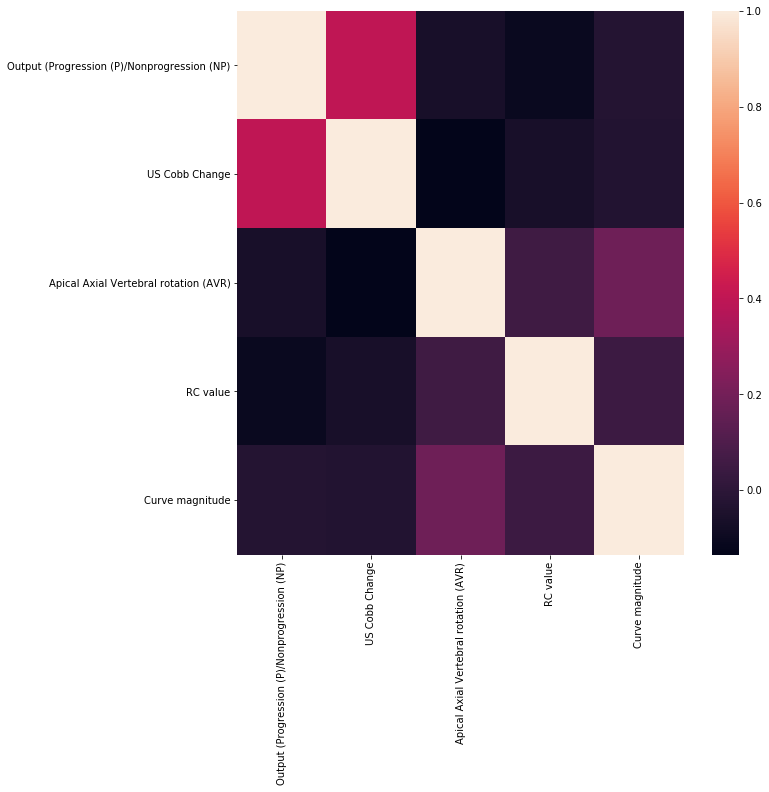

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())
plt.show()

# Splitting the data into training and testing data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=27)

# Standardizing the values

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
#Logistic Regression
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.77


# Descision Tree Classifier

In [22]:
#Descision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.81


#  K neighbhors

In [23]:
# K neighbhors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.84


C:\Users\Geeth Krishna\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


#  Random Forest Classifier 

In [24]:
# random forest classifier 

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

C:\Users\Geeth Krishna\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.84


# Confusion matrix for Logistic Regression

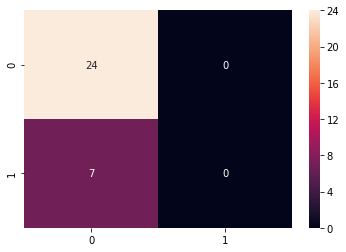

In [25]:
predicted_labels = logreg.predict(X_test)# Logistic Rgeression
cf_matrix = cm(y_test, predicted_labels)
sns.heatmap(cf_matrix, annot=True)


# Printing out the classification report for Logistic Regression

In [26]:
print("Accuracy score : {:.2f}" .format(accuracy_score(y_test, predicted_labels)*100))
s1 = (accuracy_score(y_test, predicted_labels)*100)
print("Precision score : {:.2f}" .format(precision_score(y_test, predicted_labels)))
print("Recall score : {:.2f}" .format(recall_score(y_test, predicted_labels)))
print("f1_score score : {:.2f}" .format(f1_score(y_test, predicted_labels)))

Accuracy score : 77.42
Precision score : 0.00
Recall score : 0.00
f1_score score : 0.00


C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Confusion matrix  for Decision Tree Classiifcation

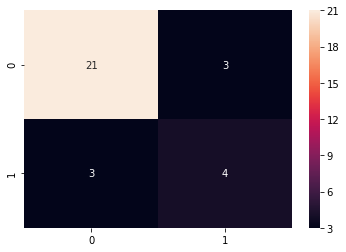

In [27]:
predicted_labels = clf.predict(X_test)# Descision Tree Classification
cf_matrix = cm(y_test, predicted_labels)
sns.heatmap(cf_matrix, annot=True)

# # Printing out the classification report for Decision Tree Classiifcation

In [28]:
print("Accuracy score : {:.2f}" .format(accuracy_score(y_test, predicted_labels)*100))
s2 = (accuracy_score(y_test, predicted_labels)*100)
print("Precision score : {:.2f}" .format(precision_score(y_test, predicted_labels)))
print("Recall score : {:.2f}" .format(recall_score(y_test, predicted_labels)))
print("f1_score score : {:.2f}" .format(f1_score(y_test, predicted_labels)))

Accuracy score : 80.65
Precision score : 0.57
Recall score : 0.57
f1_score score : 0.57


# Confusion matrix  for KNN

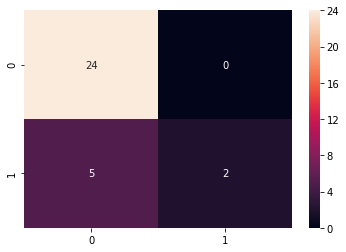

In [29]:
predicted_labels = knn.predict(X_test)# KNN
cf_matrix = cm(y_test, predicted_labels)
sns.heatmap(cf_matrix, annot=True)

# Printing out the classification report for KNN

In [30]:
print("Accuracy score : {:.2f}" .format(accuracy_score(y_test, predicted_labels)*100))
s3 = (accuracy_score(y_test, predicted_labels)*100)
print("Precision score : {:.2f}" .format(precision_score(y_test, predicted_labels)))
print("Recall score : {:.2f}" .format(recall_score(y_test, predicted_labels)))
print("f1_score score : {:.2f}" .format(f1_score(y_test, predicted_labels)))

Accuracy score : 83.87
Precision score : 1.00
Recall score : 0.29
f1_score score : 0.44


# Confusion matrix for Random Forest Classifer

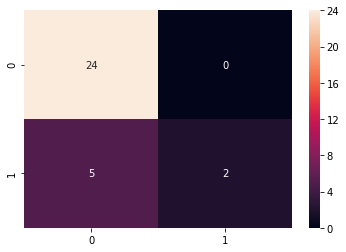

In [31]:
predicted_labels = rfc.predict(X_test)# RFC
cf_matrix = cm(y_test, predicted_labels)
sns.heatmap(cf_matrix, annot=True)

#  Printing out the classification report for Random forest Classifier

In [32]:
print("Accuracy score : {:.2f}" .format(accuracy_score(y_test, predicted_labels)*100))
s4 = (accuracy_score(y_test, predicted_labels)*100)
print("Precision score : {:.2f}" .format(precision_score(y_test, predicted_labels)))
print("Recall score : {:.2f}" .format(recall_score(y_test, predicted_labels)))
print("f1_score score : {:.2f}" .format(f1_score(y_test, predicted_labels)))


Accuracy score : 83.87
Precision score : 1.00
Recall score : 0.29
f1_score score : 0.44


# K fold validation Logistic regression

In [33]:
# K fold validation Logistic regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold  = KFold(n_splits=15, shuffle=True) # shuffle=True
result = cross_val_score(logreg, X, y, cv = kfold)
print(result)
print(np.mean(result))
ks1 = np.mean(result)

[0.72727273 0.90909091 0.81818182 0.81818182 0.9        0.8
 0.8        0.6        0.9        0.6        0.8        0.7
 0.8        0.8        1.        ]
0.7981818181818183


C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Geeth Krishna\Anacond

#  K fold validation Decision Tree Classification

In [34]:
#  K fold validation Decision Tree Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold  = KFold(n_splits=15, shuffle=True) # shuffle=True
result = cross_val_score(logreg, X, y, cv = kfold)
print(result)
print(np.mean(result))
ks2 = np.mean(result)

[0.90909091 0.72727273 0.63636364 1.         0.9        0.9
 0.8        0.9        0.7        0.7        0.9        0.5
 0.8        0.7        0.7       ]
0.7848484848484848


C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Geeth Krishna\Anacond

# K cross fold validation KNN

In [35]:
#K croos fold validation KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold  = KFold(n_splits=15, shuffle=True) # shuffle=True
result = cross_val_score(knn, X, y, cv = kfold)
print(result)
print(np.mean(result))
ks3 = np.mean(result)

[0.63636364 0.81818182 0.72727273 0.72727273 0.9        1.
 0.9        0.7        0.8        0.9        0.6        0.7
 0.6        0.5        0.9       ]
0.7606060606060605


C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversi

# Random Forest Classifier K fold cross validation

In [36]:
#Random Forest Classifier K fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold  = KFold(n_splits=15, shuffle=True) # shuffle=True
result = cross_val_score(rfc, X, y, cv = kfold)
print(result)
print(np.mean(result))
ks4 = np.mean(result)

C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Geeth Krishna\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionW

[1.         0.90909091 0.72727273 0.90909091 0.7        0.8
 0.7        0.9        0.8        0.8        0.7        0.6
 0.7        0.7        0.9       ]
0.7896969696969696


# Scatter plot for the co-related variables (Apical Axial Vertebral rotation (AVR) and Torsion)

In [38]:
#plt.figure(figsize = (10,10))
#sns.scatterplot(x = df1['Apical Axial Vertebral rotation (AVR)'], y = df1['Torsion'], palette="deep",s=150, color=".2")
#plt.xlabel('Apical Axial Vertebral rotation (AVR)')
#plt.show()


In [39]:
scores = []
Algorithms = ['Logistic', 'Decision tree', 'KNN', 'Random Forest']

In [40]:
scores.extend([s1,s2,s3,s4])

In [41]:
print(scores)

[77.41935483870968, 80.64516129032258, 83.87096774193549, 83.87096774193549]


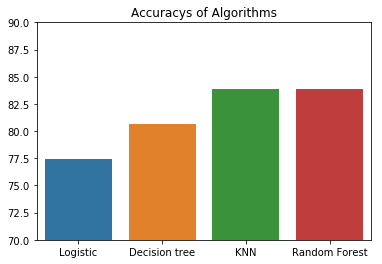

In [42]:
plt.title('Accuracys of Algorithms')
sns.barplot(x = Algorithms, y = scores)
plt.ylim(70,90)
plt.show()

In [43]:
kscores = []
kscores.extend([ks1,ks2,ks3,ks4])

In [44]:
print(kscores)

[0.7981818181818183, 0.7848484848484848, 0.7606060606060605, 0.7896969696969696]


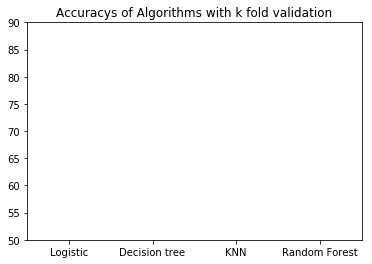

In [45]:
plt.title('Accuracys of Algorithms with k fold validation')
sns.barplot(x = Algorithms, y = kscores)
plt.ylim(50,90)
plt.show()